In [1]:
import pandas as pd
import numpy as np
import time

from sklearn import preprocessing

from sklearn.decomposition import PCA
from sklearn.decomposition import FastICA
from sklearn.random_projection import GaussianRandomProjection
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.metrics import homogeneity_score
from sklearn.metrics import completeness_score

import matplotlib.pyplot as plt

In [5]:
dfAdult = pd.read_csv(".\\data\\adult.csv")
np.random.seed = 10

# reshuffle input data ..good thing for neural netwrok
#dfAdult = dfAdult.sample(frac=1).reset_index(drop=True) 
dfAdultWithoutSalary = dfAdult.drop(columns=['salary'])
dfAdultHotEncoded = pd.get_dummies(dfAdult,columns=['salary','education','workclass','occupation','relationship','marital-status','race','sex'])
dfAdultHotEncoded = dfAdultHotEncoded.drop(columns=['salary_ <=50K','native-country'])
X_HotEncoded = dfAdultHotEncoded.drop('salary_ >50K',axis=1)
Y_HotEncoded = dfAdultHotEncoded['salary_ >50K']

X_HotEncoded_NumOfFeatures = len(list(X_HotEncoded.columns))

label_encoding = preprocessing.LabelEncoder()
dfAdult['salary'] = label_encoding.fit_transform(dfAdult['salary'])
dfAdult['education'] = label_encoding.fit_transform(dfAdult['education'])
dfAdult['workclass'] = label_encoding.fit_transform(dfAdult['workclass'])
dfAdult['occupation'] = label_encoding.fit_transform(dfAdult['occupation'])
dfAdult['relationship'] = label_encoding.fit_transform(dfAdult['relationship'])
dfAdult['marital-status'] = label_encoding.fit_transform(dfAdult['marital-status'])
dfAdult['race'] = label_encoding.fit_transform(dfAdult['race'])
dfAdult['sex'] = label_encoding.fit_transform(dfAdult['sex'])
dfAdult['native-country']=label_encoding.fit_transform(dfAdult['native-country'])

X = dfAdult.drop('salary',axis=1)
Y = dfAdult['salary']
X_LabelEncoded_NumOfFeatures = len(list(X.columns))
print(X.columns)
print(X.shape)



print(X_HotEncoded.columns)
print(X_HotEncoded.shape)
#X=X_HotEncoded
#Y=Y_HotEncoded
#X = X[:, None]


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
(32561, 14)
Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'education_ 10th', 'education_ 11th',
       'education_ 12th', 'education_ 1st-4th', 'education_ 5th-6th',
       'education_ 7th-8th', 'education_ 9th', 'education_ Assoc-acdm',
       'education_ Assoc-voc', 'education_ Bachelors', 'education_ Doctorate',
       'education_ HS-grad', 'education_ Masters', 'education_ Preschool',
       'education_ Prof-school', 'education_ Some-college', 'workclass_ ?',
       'workclass_ Federal-gov', 'workclass_ Local-gov',
       'workclass_ Never-worked', 'workclass_ Private',
       'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc',
       'workclass_ State-gov', 'workclass_ Without-pay', 'occupatio

In [6]:
dfMadelon_X = pd.read_csv(".\\data\\madelon_train.csv")
dfMadelon_Y1 = pd.read_csv(".\\data\\madelon_train_labels.csv")

dfMadelon_Y = dfMadelon_Y1['Predict']

dfMadelon = dfMadelon_X.copy()
dfMadelon["Predict"] = dfMadelon_Y
dfMadelon_X_NumOfFeatures = len(list(dfMadelon_X.columns))
print(dfMadelon_X.shape)
print(dfMadelon_Y.shape)
print(dfMadelon.columns)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
dfMadelon_X_scaled=scaler.fit_transform(dfMadelon_X)

print(dfMadelon_X_scaled.shape)
from sklearn.preprocessing import Normalizer
normaliser = Normalizer()
dfMadelon_X_normalized=normaliser.fit_transform(dfMadelon_X)
print(dfMadelon_X_normalized.shape)
np.random.seed =10

(2000, 500)
(2000,)
Index(['Col1', 'Col2', 'Col3', 'Col4', 'Col5', 'Col6', 'Col7', 'Col8', 'Col9',
       'Col10',
       ...
       'Col492', 'Col493', 'Col494', 'Col495', 'Col496', 'Col497', 'Col498',
       'Col499', 'Col500', 'Predict'],
      dtype='object', length=501)
(2000, 500)
(2000, 500)


In [7]:
def PCA_EM(data,i):
        model = PCA(n_components=i)        
        data_new = model.fit_transform(data)
        return data_new

In [8]:
def ICA_EM(data,i):
        model = FastICA(n_components=i,max_iter=10000,tol=0.01)        
        data_new = model.fit_transform(data)
        return data_new

In [9]:
def RP_EM(data,i):
        model = GaussianRandomProjection(n_components=i)
        data_new = model.fit_transform(data)
        return data_new

In [10]:
def LDA_EM(data,groundtruth):
        model = LinearDiscriminantAnalysis(n_components=1)
        data_new = model.fit(data,groundtruth).transform(data)
        return data_new

In [11]:
def CalculateBICScore(X,actual_label):
    lowest_bic = np.infty
    bic = []
    aic = []
    score_ = []
    silhouette_avg = []
    loglowerbound =[]
    iterations =[]
    converged =[]
    homogeneity =[]
    completeness = []
    n_components_range = range(2, 10)
    cv_types = ['full']
    for cv_type in cv_types:
        for n_components in n_components_range:
            # Fit a Gaussian mixture with EM
            gmm = GaussianMixture(n_components=n_components,
                                          covariance_type=cv_type,random_state=10,max_iter=1000)
            gmm.fit(X)
            bic_score = gmm.bic(X)
            score = gmm.score(X)
            aic_score = gmm.aic(X)
            cluster_labels = gmm.predict(X)
            silscore = silhouette_score(X, cluster_labels)
            homogeneity_avg = homogeneity_score(actual_label, cluster_labels)
            homogeneity.append(homogeneity_avg)
            completeness_avg = completeness_score(actual_label, cluster_labels)
            completeness.append(completeness_avg)
            print("Component_",n_components," BIC Score is = ",bic_score, " and logscore = ",score," AIC score= ",aic_score," Silhoueete =",silscore)
            loglowerbound.append(gmm.lower_bound_)
            iterations.append(gmm.n_iter_)
            converged.append(gmm.converged_)
            bic.append(bic_score)
            score_.append(score)
            aic.append(aic_score)
            silhouette_avg.append(silscore)
            if bic[-1] < lowest_bic:
                lowest_bic = bic[-1]
                best_gmm = gmm
    
    plt.figure(figsize=(7,4))
    plt.title("The GMM BIC and AIC score\nfor determining number of clusters\n",fontsize=16)
    plt.scatter(x=[i for i in range(2,10)],y=bic,s=150,edgecolor='k',label='BIC')
    plt.scatter(x=[i for i in range(2,10)],y=aic,s=150,edgecolor='r',label='AIC')
    plt.grid(True)
    plt.xlabel("Number of clusters",fontsize=14)
    plt.ylabel("Gaussian mixture BIC and AIC score",fontsize=15)
    plt.xticks([i for i in range(2,10)],fontsize=14)
    plt.yticks(fontsize=15)
    plt.legend(scatterpoints=1)
    plt.show()
    
    plt.plot(range(2, 10), homogeneity, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Homogenity Score')
    plt.show()
    
    plt.plot(range(2, 10), completeness, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Completeness Score')
    plt.show()
    
    plt.title("The GMM log-likelihoodscore\nfor determining number of clusters\n",fontsize=16)
    plt.scatter(x=[i for i in range(2,10)],y=score_,s=150,edgecolor='k')
    plt.xlabel("Number of clusters",fontsize=14)
    plt.ylabel("Log-Likelihood score",fontsize=15)    
    plt.show()
    
    plt.title("The GMM silhouette score \nfor determining number of clusters\n",fontsize=16)
    plt.scatter(x=[i for i in range(2,10)],y=silhouette_avg,s=150,edgecolor='k')
    plt.xlabel("Number of clusters",fontsize=14)
    plt.ylabel("silhouette_avg score",fontsize=15)    
    plt.show()
    
    plt.title("The GMM converged log score \nfor determining number of clusters\n",fontsize=16)
    plt.scatter(x=[i for i in range(2,10)],y=loglowerbound,s=150,edgecolor='k',label='loglowerbound')
    #plt.scatter(x=[i for i in range(2,10)],y=iterations,s=150,edgecolor='g',label='iterations')
    plt.xlabel("Number of clusters",fontsize=14)
    plt.ylabel("loglowerbound score",fontsize=15)
    plt.legend(scatterpoints=1)
    plt.show()
   
    return best_gmm

In [23]:
def Plot2MeansCluster(X,y_km,km):
    plt.scatter(
        X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )

    plt.scatter(
        X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )
    
    # plot the means
    plt.scatter(
        km.means_[:, 0], km.means_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='means'
    )
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

In [22]:
def Plot3MeansCluster(X,y_km,km):
    plt.scatter(
        X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )

    plt.scatter(
        X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )

    plt.scatter(
        X[y_km == 2, 0], X[y_km == 2, 1],
        s=50, c='lightblue',
        marker='v', edgecolor='black',
        label='cluster 3'
    )
      # plot the means
    plt.scatter(
        km.means_[:, 0], km.means_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='means'
    )
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

In [24]:
def Plot8MeansCluster(X,y_km,km):
    plt.scatter(
        X[y_km == 0, 0], X[y_km == 0, 1],
        s=50, c='lightgreen',
        marker='s', edgecolor='black',
        label='cluster 1'
    )

    plt.scatter(
        X[y_km == 1, 0], X[y_km == 1, 1],
        s=50, c='orange',
        marker='o', edgecolor='black',
        label='cluster 2'
    )
    
    plt.scatter(
        X[y_km == 2, 0], X[y_km == 2, 1],
        s=50, c='lightblue',
        marker='o', edgecolor='black',
        label='cluster 3'
    )
    
    plt.scatter(
        X[y_km == 3, 0], X[y_km == 3, 1],
        s=50, c='brown',
        marker='o', edgecolor='black',
        label='cluster 4'
    )
    
    plt.scatter(
        X[y_km == 4, 0], X[y_km == 4, 1],
        s=50, c='pink',
        marker='o', edgecolor='black',
        label='cluster 5'
    )
    
    plt.scatter(
        X[y_km == 5, 0], X[y_km == 5, 1],
        s=50, c='black',
        marker='o', edgecolor='black',
        label='cluster 6'
    )

    plt.scatter(
        X[y_km == 6, 0], X[y_km == 6, 1],
        s=50, c='yellow',
        marker='v', edgecolor='black',
        label='cluster 7'
    )
    
    plt.scatter(
        X[y_km == 7, 0], X[y_km == 7, 1],
        s=50, c='green',
        marker='v', edgecolor='black',
        label='cluster 8'
    )
    
      # plot the means
    plt.scatter(
        km.means_[:, 0], km.means_[:, 1],
        s=250, marker='*',
        c='red', edgecolor='black',
        label='means'
    )
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.legend(scatterpoints=1)
    plt.grid()
    plt.show()

Component_ 2  BIC Score is =  710257.902508625  and logscore =  -10.904818693110945  AIC score=  710165.602932771  Silhoueete = 0.001643846112657044
Component_ 3  BIC Score is =  701726.845039714  and logscore =  -10.772860173837827  AIC score=  701584.200240667  Silhoueete = -0.060720940352824194
Component_ 4  BIC Score is =  679161.2822003652  and logscore =  -10.425390684839611  AIC score=  678968.2921781251  Silhoueete = -0.032041655489667704
Component_ 5  BIC Score is =  678041.1876504512  and logscore =  -10.407233383572649  AIC score=  677797.852405018  Silhoueete = -0.09494735250390918
Component_ 6  BIC Score is =  677800.9132185578  and logscore =  -10.402586418567179  AIC score=  677507.2327499317  Silhoueete = -0.2051200081868433
Component_ 7  BIC Score is =  674007.91082273  and logscore =  -10.34338449572972  AIC score=  673663.8851309109  Silhoueete = 0.031199082670587217
Component_ 8  BIC Score is =  676941.3522651034  and logscore =  -10.387472457081957  AIC score=  676

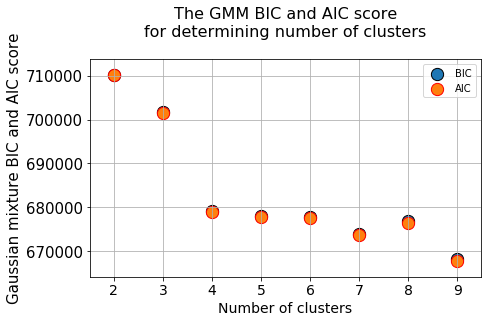

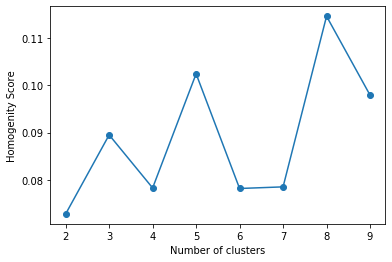

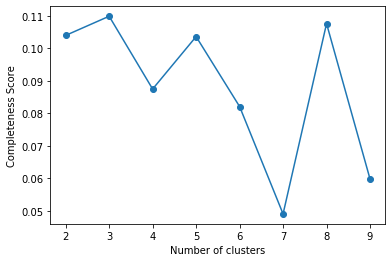

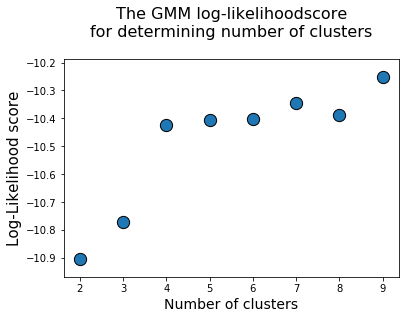

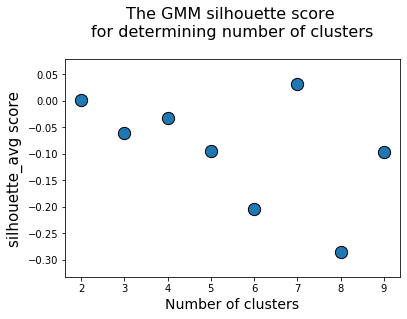

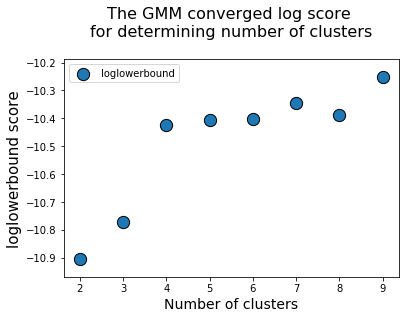

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
                means_init=None, n_components=9, n_init=1, precisions_init=None,
                random_state=10, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [9]:
#ADULT PCA_EM
data_new = PCA_EM(X_HotEncoded,2)
CalculateBICScore(data_new,Y_HotEncoded)

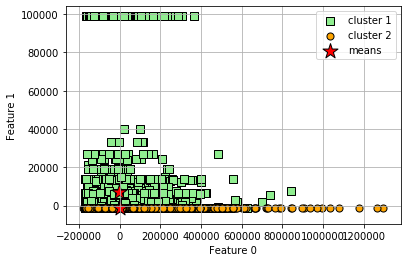

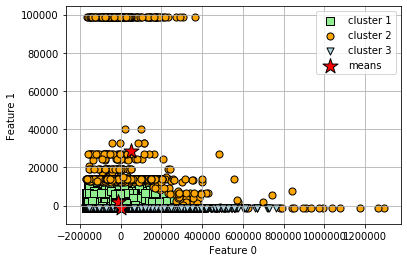

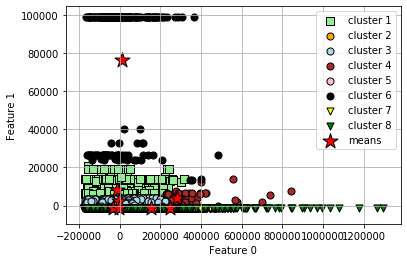

In [25]:
#Adult dataSet with one hot encoded with no ground truth n_components=2
data_new = PCA_EM(X_HotEncoded,2)
gmm = GaussianMixture(n_components = 2,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot2MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)


gmm = GaussianMixture(n_components = 3,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot3MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)

gmm = GaussianMixture(n_components = 8,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot8MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)

Component_ 2  BIC Score is =  135533.09210592322  and logscore =  138.8491355922279  AIC score=  -373594.54236891156  Silhoueete = 0.01317991390907345
Component_ 3  BIC Score is =  418991.887658303  and logscore =  154.35159112629475  AIC score=  -344702.364505179  Silhoueete = 0.010234905809158765
Component_ 4  BIC Score is =  689419.788253715  and logscore =  173.11177039960353  AIC score=  -328841.0815984141  Silhoueete = 0.008504690305473486
Component_ 5  BIC Score is =  929546.1119330209  and logscore =  199.44734390193886  AIC score=  -343281.3756077555  Silhoueete = 0.008194824036963724
Component_ 6  BIC Score is =  1014603.9053986338  and logscore =  264.55004995769747  AIC score=  -512790.1998307898  Silhoueete = 0.007571231395228824
Component_ 7  BIC Score is =  1132300.760180149  and logscore =  321.49299068448045  AIC score=  -649659.9627379219  Silhoueete = 0.0073774916210522555
Component_ 8  BIC Score is =  1016215.4187575688  and logscore =  436.88148046228724  AIC score

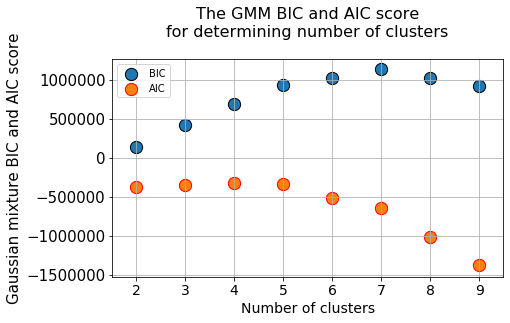

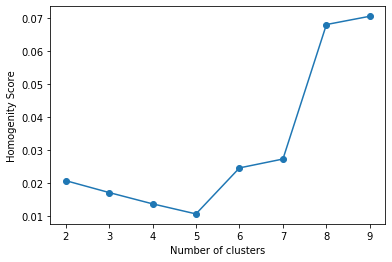

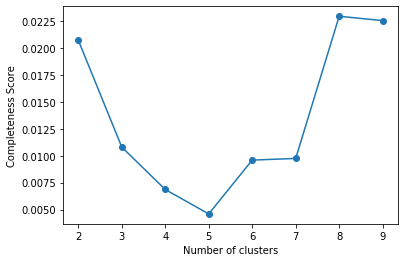

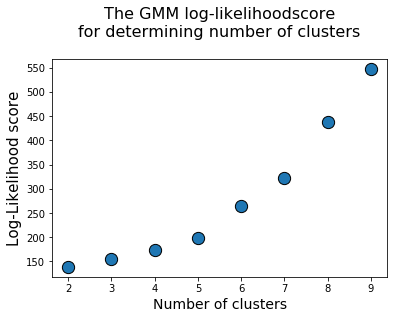

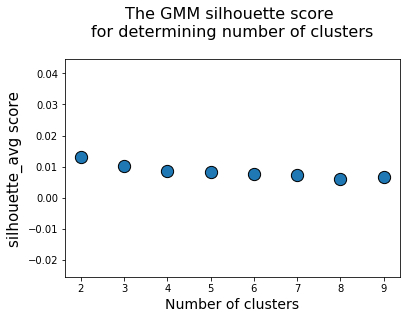

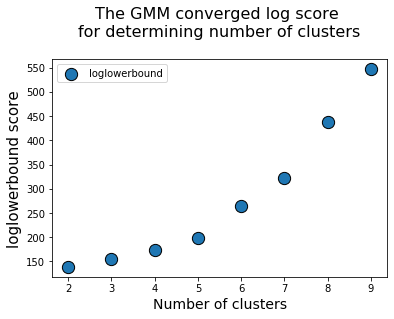

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=10, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [10]:
#Madelon PCA_KMEANS
data_new = PCA_EM(dfMadelon_X_scaled,300)
CalculateBICScore(data_new,dfMadelon_Y)

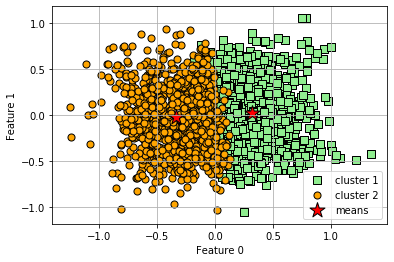

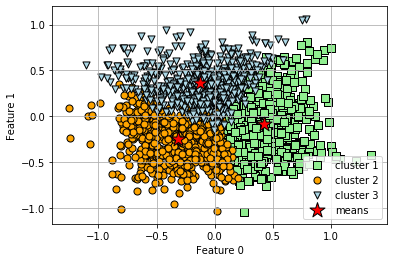

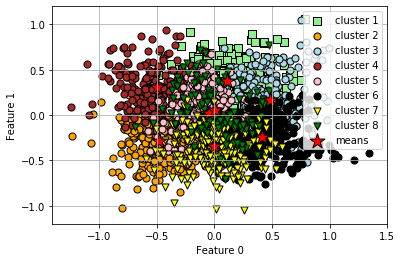

In [26]:
#Madelon PCA_KMEANS
data_new = PCA_EM(dfMadelon_X_scaled,300)

gmm = GaussianMixture(n_components = 2,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot2MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)


gmm = GaussianMixture(n_components = 3,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot3MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)

gmm = GaussianMixture(n_components = 8,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot8MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)

Component_ 2  BIC Score is =  -600545.4141233029  and logscore =  9.223606672079434  AIC score=  -600637.7136991569  Silhoueete = 0.6372620541459459
Component_ 3  BIC Score is =  -606946.0854637583  and logscore =  9.322851421375347  AIC score=  -607088.7302628054  Silhoueete = 0.43815569592904086
Component_ 4  BIC Score is =  -610439.8977865163  and logscore =  9.377459043161396  AIC score=  -610632.8878087564  Silhoueete = 0.44426814301909173
Component_ 5  BIC Score is =  -611591.8708359817  and logscore =  9.39610586409224  AIC score=  -611835.2060814148  Silhoueete = 0.40601250158728375
Component_ 6  BIC Score is =  -612722.7474060815  and logscore =  9.414428731837285  AIC score=  -613016.4278747076  Silhoueete = 0.5104554949195582
Component_ 7  BIC Score is =  -612763.1621323542  and logscore =  9.416006692426114  AIC score=  -613107.1878241734  Silhoueete = 0.46985652567319797
Component_ 8  BIC Score is =  -613062.2886598944  and logscore =  9.421557378073564  AIC score=  -61345

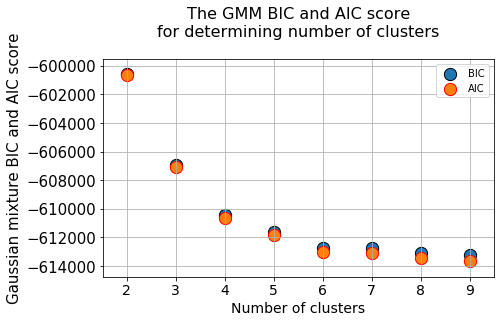

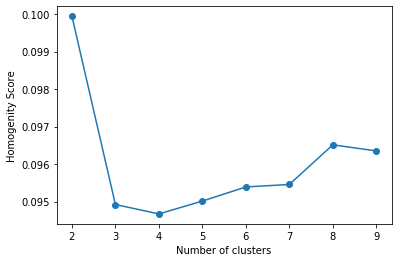

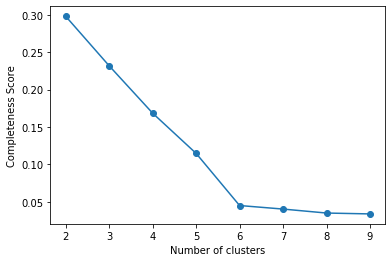

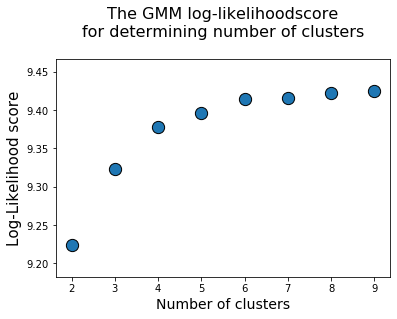

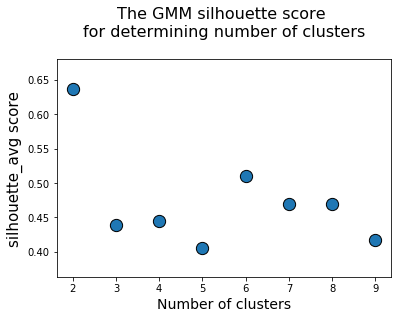

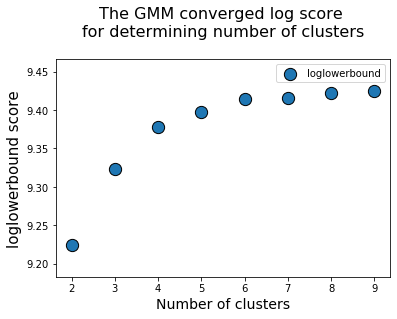

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
                means_init=None, n_components=9, n_init=1, precisions_init=None,
                random_state=10, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [11]:
#ADULT ICA_KMEANS
data_new = ICA_EM(X_HotEncoded,2)
CalculateBICScore(data_new,Y_HotEncoded)

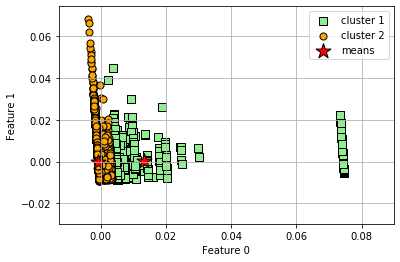

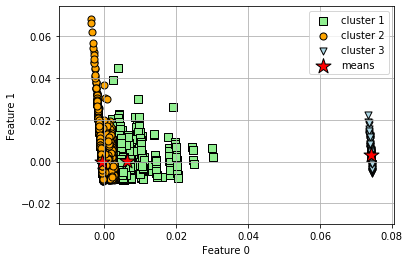

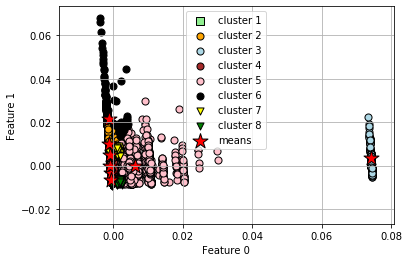

In [27]:
data_new = ICA_EM(X_HotEncoded,2)
gmm = GaussianMixture(n_components = 2,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot2MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)


gmm = GaussianMixture(n_components = 3,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot3MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)

gmm = GaussianMixture(n_components = 8,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot8MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)

C:\Users\vparihar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


Component_ 2  BIC Score is =  -279005.8582229827  and logscore =  71.63458814009721  AIC score=  -284556.35256038886  Silhoueete = 0.016043536269229636
Component_ 3  BIC Score is =  -276065.6197044963  and logscore =  71.84204041545885  AIC score=  -284394.1616618354  Silhoueete = 0.01160677979283334
Component_ 4  BIC Score is =  -273178.2817943969  and logscore =  72.06271784291722  AIC score=  -284284.8713716689  Silhoueete = 0.004246107233635449
Component_ 5  BIC Score is =  -270342.9054095969  and logscore =  72.29638565170043  AIC score=  -284227.5426068017  Silhoueete = 0.001082425084935092
Component_ 6  BIC Score is =  -267280.28235659696  and logscore =  72.47324179343367  AIC score=  -283942.9671737347  Silhoueete = 0.002936398938777221
Component_ 7  BIC Score is =  -264368.8460728363  and logscore =  72.68789462747672  AIC score=  -283809.5785099069  Silhoueete = 0.004445197786014486
Component_ 8  BIC Score is =  -261508.14217360556  and logscore =  72.91523055765225  AIC sco

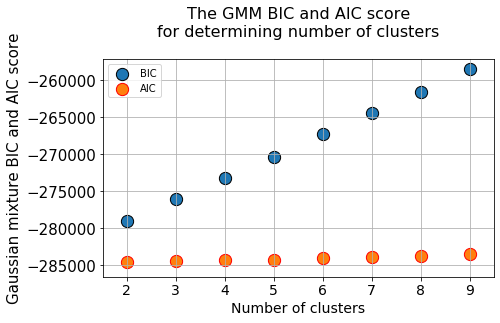

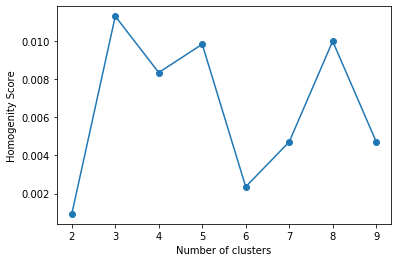

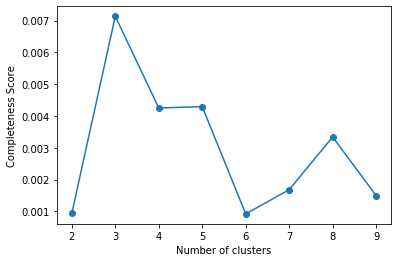

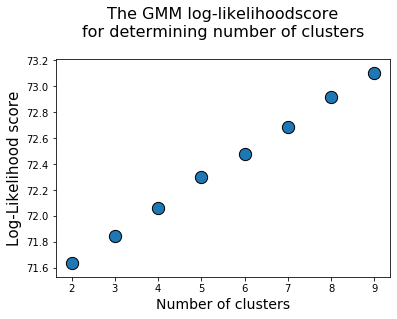

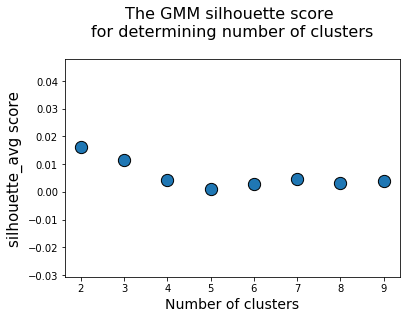

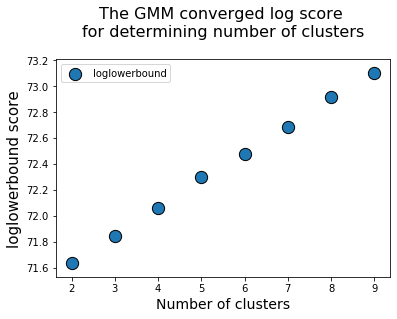

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=10, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [12]:
#Madelon ICA_KMEANS
data_new = ICA_EM(dfMadelon_X_scaled,30)
CalculateBICScore(data_new,dfMadelon_Y)

C:\Users\vparihar\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\decomposition\_fastica.py:119: ConvergenceWarning: FastICA did not converge. Consider increasing tolerance or the maximum number of iterations.
  ConvergenceWarning)


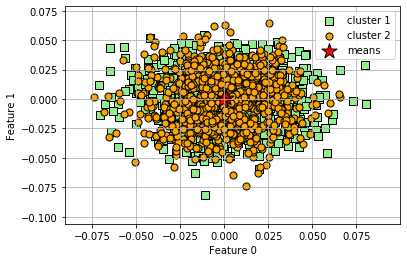

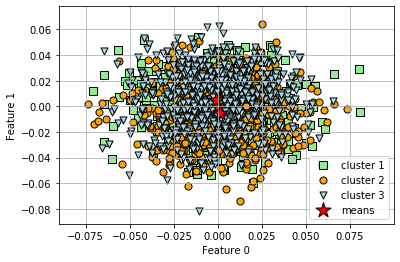

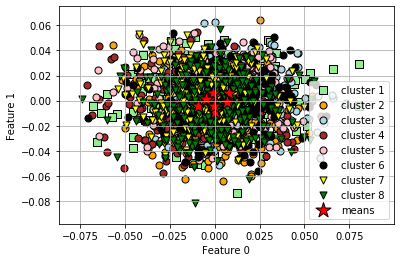

In [28]:
data_new = ICA_EM(dfMadelon_X_scaled,30)

gmm = GaussianMixture(n_components = 2,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot2MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)


gmm = GaussianMixture(n_components = 3,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot3MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)

gmm = GaussianMixture(n_components = 8,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot8MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)

Component_ 2  BIC Score is =  1491449.799016789  and logscore =  -22.899363847496662  AIC score=  1491290.3724766776  Silhoueete = 0.11719558513745547
Component_ 3  BIC Score is =  1347277.8471412722  and logscore =  -20.68389349061514  AIC score=  1347034.5118958391  Silhoueete = -0.032159296058875346
Component_ 4  BIC Score is =  1340402.8999236673  and logscore =  -20.57672761851467  AIC score=  1340075.6559729124  Silhoueete = 0.04607728700366277
Component_ 5  BIC Score is =  1335166.7095990265  and logscore =  -20.494726159254167  AIC score=  1334755.5569429498  Silhoueete = -0.12574339213775296
Component_ 6  BIC Score is =  1337604.075071329  and logscore =  -20.530558240071414  AIC score=  1337109.0137099307  Silhoueete = -0.1475866249028967
Component_ 7  BIC Score is =  1333312.8024237948  and logscore =  -20.463066741762763  AIC score=  1332733.8323570746  Silhoueete = -0.19250734710890968
Component_ 8  BIC Score is =  1326918.1401308002  and logscore =  -20.363276025901513  A

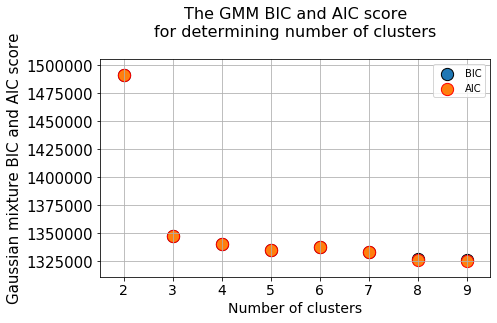

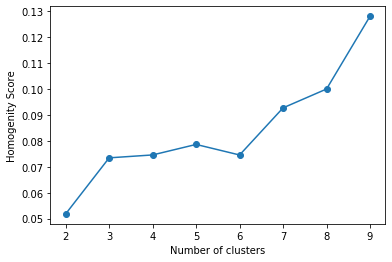

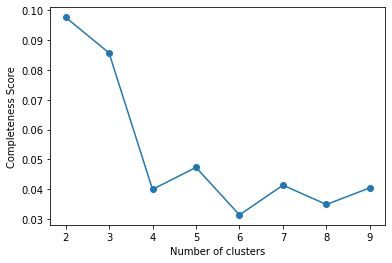

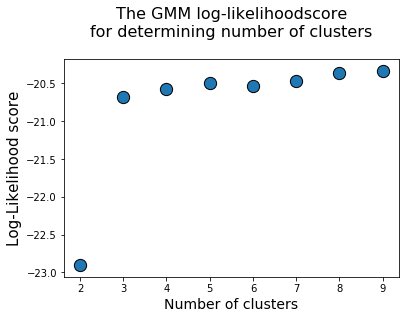

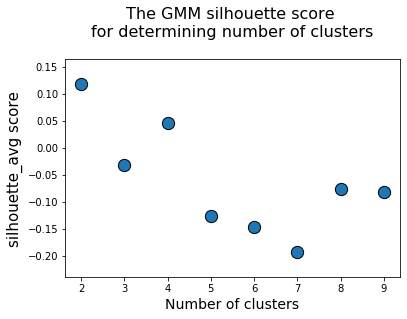

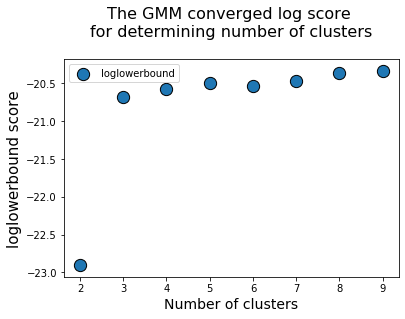

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
                means_init=None, n_components=9, n_init=1, precisions_init=None,
                random_state=10, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [13]:
#ADULT RP_KMEANS
data_new = RP_EM(X_HotEncoded,3)
CalculateBICScore(data_new,Y_HotEncoded)

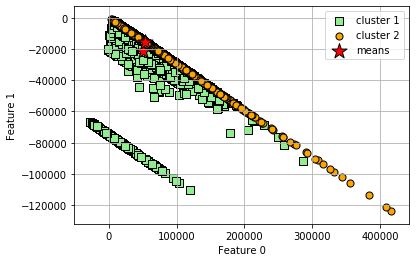

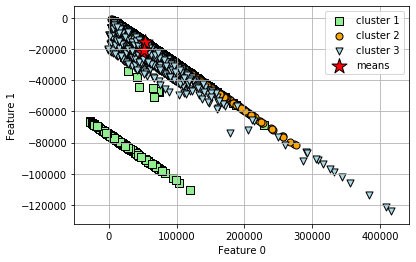

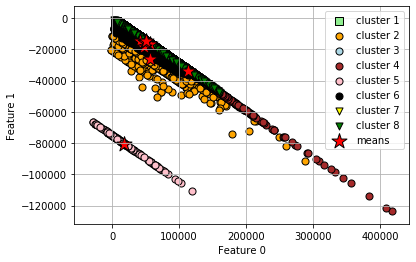

In [29]:
#ADULT RP_KMEANS
data_new = RP_EM(X_HotEncoded,3)

gmm = GaussianMixture(n_components = 2,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot2MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)


gmm = GaussianMixture(n_components = 3,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot3MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)

gmm = GaussianMixture(n_components = 8,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot8MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)

Component_ 2  BIC Score is =  105476.86159775523  and logscore =  -24.71791934010329  AIC score=  100609.67736041316  Silhoueete = 0.02058456315367167
Component_ 3  BIC Score is =  107966.4847571124  and logscore =  -24.51372698746738  AIC score=  100662.90794986952  Silhoueete = 0.005467335145203416
Component_ 4  BIC Score is =  110588.84473243519  and logscore =  -24.342718838822876  AIC score=  100848.8753552915  Silhoueete = 0.008008404803067517
Component_ 5  BIC Score is =  113215.278869463  and logscore =  -24.17272923060463  AIC score=  101038.91692241852  Silhoueete = 0.008662522993976084
Component_ 6  BIC Score is =  115535.02204535798  and logscore =  -23.92606688210317  AIC score=  100922.26752841269  Silhoueete = 0.0016588817745517468
Component_ 7  BIC Score is =  118327.82597200302  and logscore =  -23.79766972128923  AIC score=  101278.67888515691  Silhoueete = 0.006392216157516801
Component_ 8  BIC Score is =  120874.01801003214  and logscore =  -23.60761958832131  AIC s

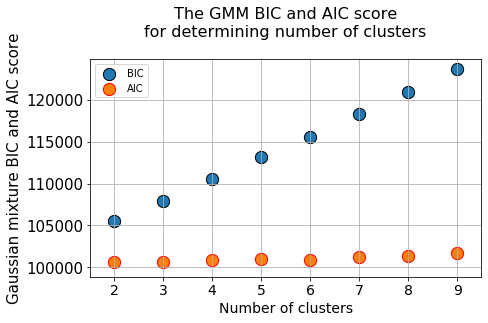

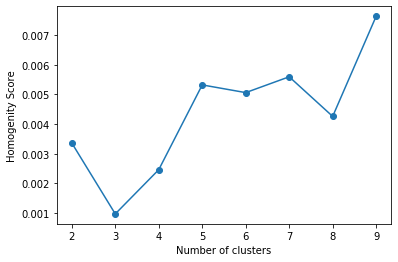

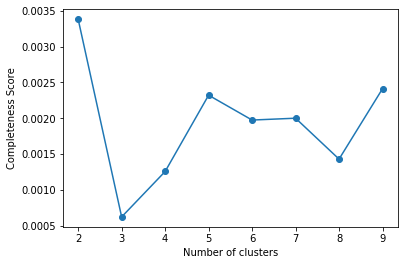

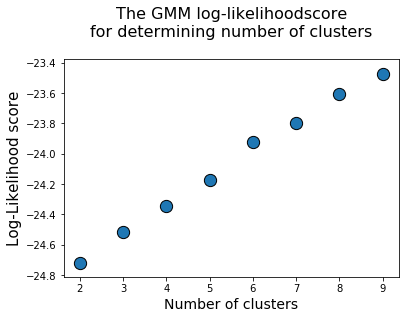

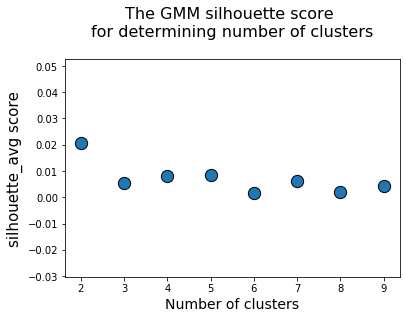

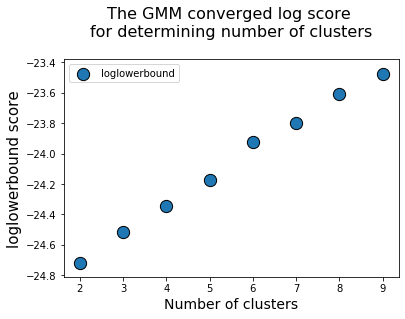

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=10, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [14]:
#Madelon RP_KMEANS
data_new = RP_EM(dfMadelon_X_scaled,28)
CalculateBICScore(data_new,dfMadelon_Y)

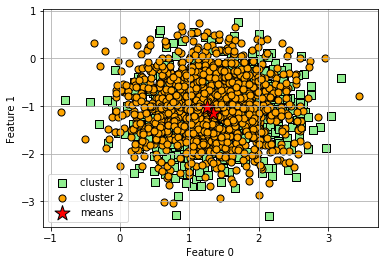

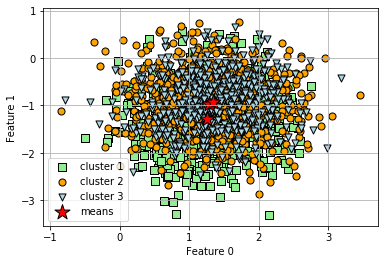

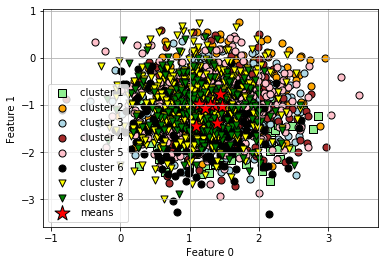

In [30]:
#Madelon RP_KMEANS
data_new = RP_EM(dfMadelon_X_scaled,28)

gmm = GaussianMixture(n_components = 2,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot2MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)


gmm = GaussianMixture(n_components = 3,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot3MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)

gmm = GaussianMixture(n_components = 8,random_state=10)
y_km = gmm.fit_predict(pd.DataFrame(data_new))
#print(labels)

Plot8MeansCluster(pd.DataFrame(data_new).values[:,:],y_km,gmm)

Component_ 2  BIC Score is =  102298.05523679011  and logscore =  -1.570070035995965  AIC score=  102256.10088412924  Silhoueete = 0.5160723661566912
Component_ 3  BIC Score is =  101496.7299264361  and logscore =  -1.5572863696166994  AIC score=  101429.6029621787  Silhoueete = 0.5997135519445379
Component_ 4  BIC Score is =  100769.52774087153  and logscore =  -1.5456409226531371  AIC score=  100677.2281650176  Silhoueete = 0.5811438290653452
Component_ 5  BIC Score is =  100547.75091213845  and logscore =  -1.5417566832205398  AIC score=  100430.27872468799  Silhoueete = 0.5499096568349771
Component_ 6  BIC Score is =  100498.73520574966  and logscore =  -1.5405253279491211  AIC score=  100356.09040670267  Silhoueete = 0.5313130778526588
Component_ 7  BIC Score is =  100592.49371833356  and logscore =  -1.5414863841357764  AIC score=  100424.67630769004  Silhoueete = 0.5205234037778906
Component_ 8  BIC Score is =  100499.03916444983  and logscore =  -1.5395726350881391  AIC score= 

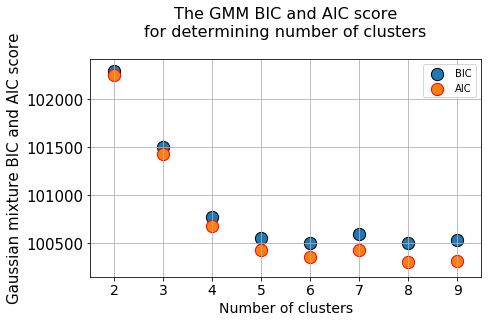

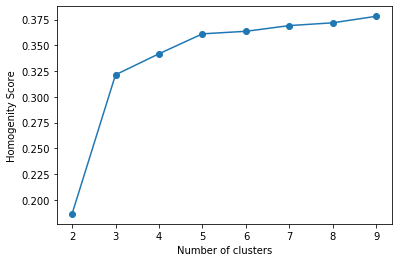

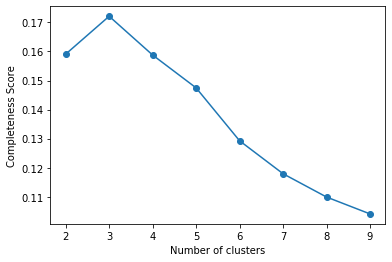

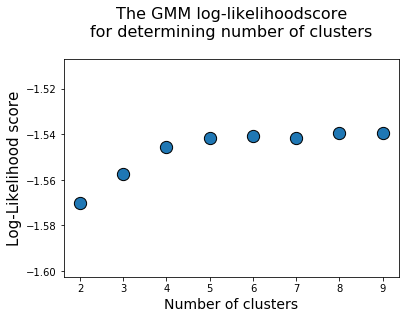

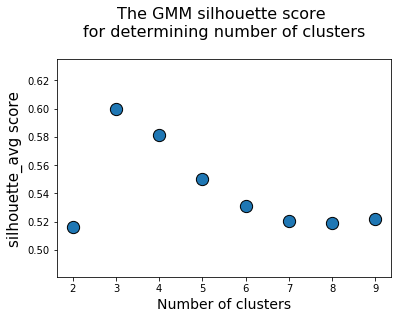

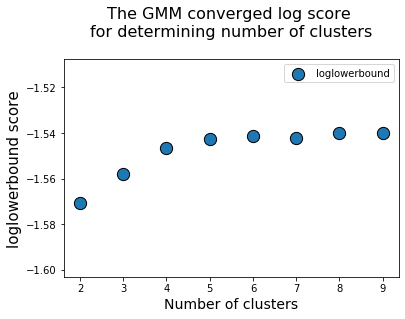

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
                means_init=None, n_components=6, n_init=1, precisions_init=None,
                random_state=10, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [7]:
#ADULT LDA_KMEANS
data_new = LDA_EM(X_HotEncoded,Y_HotEncoded)
CalculateBICScore(data_new,Y_HotEncoded)

Component_ 2  BIC Score is =  6419.704619176816  and logscore =  -1.5954250267197763  AIC score=  6391.700106879105  Silhoueete = 0.5639892967308053
Component_ 3  BIC Score is =  6445.665813389724  and logscore =  -1.5962146484283466  AIC score=  6400.858593713387  Silhoueete = 0.5214701349235029
Component_ 4  BIC Score is =  6468.43182903622  and logscore =  -1.596205475495314  AIC score=  6406.821901981257  Silhoueete = 0.5349707444773494
Component_ 5  BIC Score is =  6496.332209515775  and logscore =  -1.5974798937705463  AIC score=  6417.9195750821855  Silhoueete = 0.5250837060126043
Component_ 6  BIC Score is =  6511.662613267555  and logscore =  -1.5956118178638348  AIC score=  6416.447271455339  Silhoueete = 0.5270810694569464
Component_ 7  BIC Score is =  6535.085842540422  and logscore =  -1.5957669483373953  AIC score=  6423.067793349581  Silhoueete = 0.5164532658011256
Component_ 8  BIC Score is =  6555.16621743016  and logscore =  -1.595086365215173  AIC score=  6426.345460

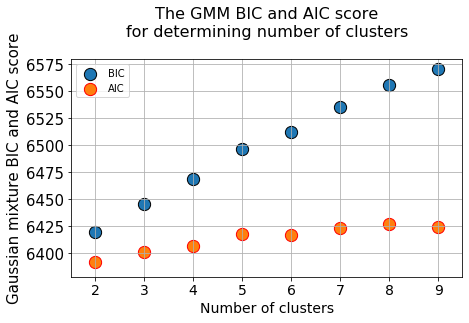

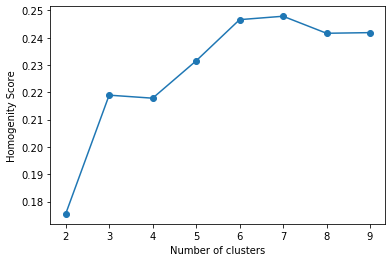

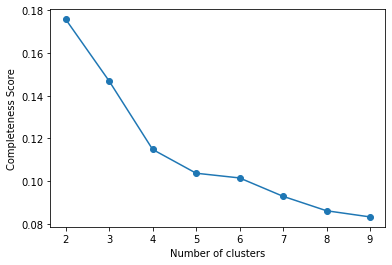

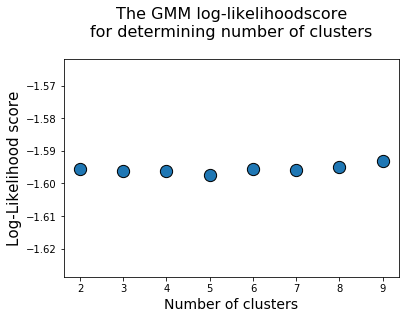

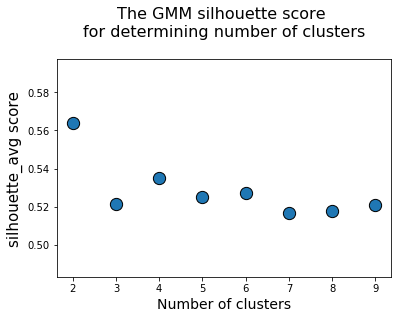

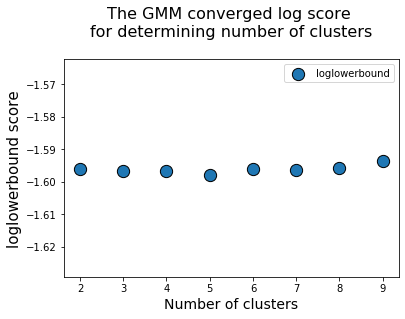

GaussianMixture(covariance_type='full', init_params='kmeans', max_iter=1000,
                means_init=None, n_components=2, n_init=1, precisions_init=None,
                random_state=10, reg_covar=1e-06, tol=0.001, verbose=0,
                verbose_interval=10, warm_start=False, weights_init=None)

In [8]:
#Madelon LDA_KMEANS
data_new = LDA_EM(dfMadelon_X_scaled,dfMadelon_Y)
CalculateBICScore(data_new,dfMadelon_Y)